In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
iris = load_iris()

# Make the dataframe
iris_fea = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# target label to df
iris_fea["target"] = iris.target

# add target name
iris_fea["target_name"] = iris_fea["target"].apply(lambda x : iris.target_names[x])

print(iris_fea.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [ ]:
# only take the need and drop unneeded
iris_d = iris_fea[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]

iris_d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# finding the elbow to assign number of cluster

k_rag = range(1, 10)
sse = []

for k in k_rag:
    km = KMeans(n_clusters=k)
    km.fit_predict(iris_d)
    sse.append(km.inertia_)


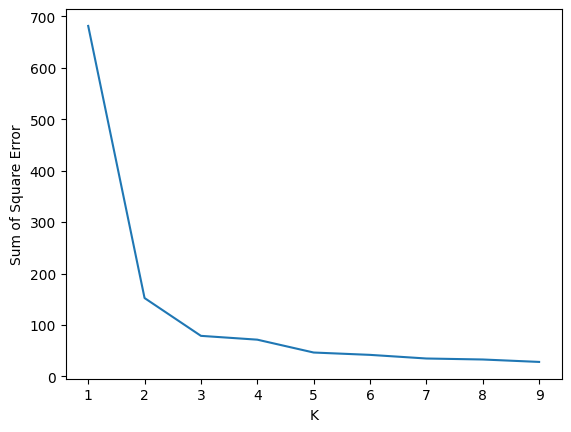

In [9]:
# draw the plot to find elbow

plt.xlabel("K")
plt.ylabel("Sum of Square Error")
plt.plot(k_rag, sse)
plt.show()

In [14]:
# Scale the dataset using the MinMax

scaler = MinMaxScaler()
iris_d["sepal_length"] = scaler.fit_transform(iris_d[["sepal length (cm)"]])
iris_d["sepal_width"] = scaler.fit_transform(iris_d[["sepal width (cm)"]])
iris_d["petal_length"] = scaler.fit_transform(iris_d[["petal length (cm)"]])
iris_d["petal_width"] = scaler.fit_transform(iris_d[["petal width (cm)"]])

iris_d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2,0.222222,0.625000,0.067797,0.041667
1,4.9,3.0,1.4,0.2,0.166667,0.416667,0.067797,0.041667
2,4.7,3.2,1.3,0.2,0.111111,0.500000,0.050847,0.041667
3,4.6,3.1,1.5,0.2,0.083333,0.458333,0.084746,0.041667
4,5.0,3.6,1.4,0.2,0.194444,0.666667,0.067797,0.041667


In [17]:
# create the KMeans model
km = KMeans(n_clusters=3)

predicted = km.fit_predict(iris_d[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
iris_d["Cluster"] = predicted

predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

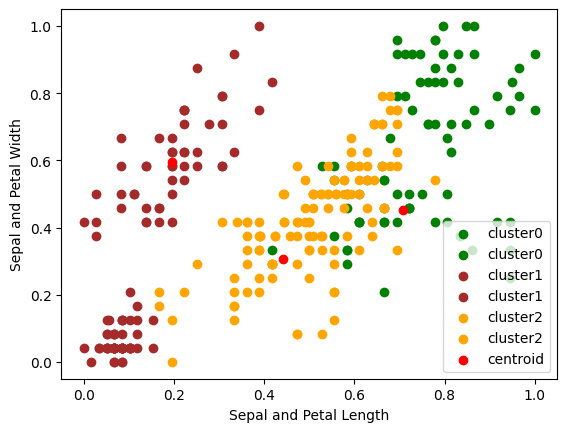

In [21]:
# separate the cluster rows

df1 = iris_d[iris_d.Cluster == 0]
df2 = iris_d[iris_d.Cluster == 1]
df3 = iris_d[iris_d.Cluster == 2]

plt.scatter(df1[["sepal_length"]], df1[["sepal_width"]], label="cluster0", color="green")
plt.scatter(df1[["petal_length"]], df1[["petal_width"]], label="cluster0", color="green")

plt.scatter(df2[["sepal_length"]], df2[["sepal_width"]], label="cluster1", color="brown")
plt.scatter(df2[["petal_length"]], df2[["petal_width"]], label="cluster1", color="brown")

plt.scatter(df3[["sepal_length"]], df3[["sepal_width"]], label="cluster2", color="orange")
plt.scatter(df3[["petal_length"]], df3[["petal_width"]], label="cluster2", color="orange")

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], label="centroid", color="red")

plt.xlabel("Sepal and Petal Length")
plt.ylabel("Sepal and Petal Width")
plt.legend()
plt.show()

